## Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

## Membaca Data

In [2]:
dataset = pd.read_csv("Produksi Bandeng Provinsi.csv", sep=";")

## Mengelompokkan data provinsi berdasarkan Volume Produksi

In [3]:
avg_vol = dataset.groupby("Provinsi")["Volume Produksi"].mean()

In [4]:
print('Rata-rata Volume Produksi Bandeng:\n', avg_vol)

Rata-rata Volume Produksi Bandeng:
 Provinsi
ACEH                           22184.470909
BALI                              99.979000
BANTEN                         12171.280000
BENGKULU                         243.381000
DAERAH ISTIMEWA YOGYAKARTA        10.702500
DKI JAKARTA                     1578.089091
GORONTALO                      10553.077273
JAMBI                            750.909091
JAWA BARAT                     91157.995455
JAWA TENGAH                    72597.519091
JAWA TIMUR                    136245.781818
KALIMANTAN BARAT                9123.312727
KALIMANTAN SELATAN             20515.524545
KALIMANTAN TENGAH              10786.175455
KALIMANTAN TIMUR               16554.790000
KALIMANTAN UTARA                2744.716667
KEPULAUAN BANGKA BELITUNG         22.164000
KEPULAUAN RIAU                    12.304444
LAMPUNG                         6750.873636
MALUKU                             4.999091
MALUKU UTARA                      64.565000
NUSA TENGGARA BARAT            

# Agglomerative Clustering
Agglomerative clustering merupakan algoritma Clustering yang dimulai dengan jumlah cluster yang tetap. Algoritma ini menempatkan data ke dalam jumlah cluster yang tepat. <br>
Agglormerative Clustering termasuk ke dalam <b>Hierarchical Clustering</b>, pada Hierarchical Clustering setiap  data harus termasuk dalam cluster tertentu, dan data  yang  termasuk  dalam cluster tertentu pada  suatu  iterasi,  tidak  dapat  berpindah ke clusterlain. <br>
## Ilustrasi Hierarchical Clustering 
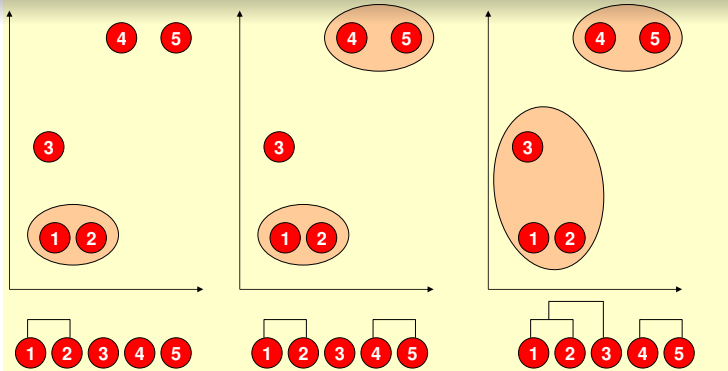
<b>=====================================================================================================</b>

## Implementasi
Karena nilai optimal kluster pada metode siku sebelumnya klaster = 4 maka parameter n_clusters pada fungsi AgglomerativeClustering dapat diisi dengan value 4

In [5]:
clustering=AgglomerativeClustering(n_clusters=4, linkage='average')
clusters=clustering.fit_predict(avg_vol.values.reshape(-1, 1))

In [6]:
print('\nHasil clustering:\n', clusters)


Hasil clustering:
 [1 1 1 1 1 1 1 1 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1]


## Interpretasi Hasil Clustering

In [7]:
avg_vol=pd.DataFrame({'Provinsi':avg_vol.index, 'Rata-Rata Vol':avg_vol.values, 'Cluster':clusters})

In [8]:
centroid_perdata=avg_vol.groupby('Cluster')['Rata-Rata Vol'].transform('mean')
centroid=np.unique(centroid_perdata)

In [9]:
sorted_centroid=np.sort(centroid)
Level4, Level3, Level2, Level1 = sorted_centroid[0], sorted_centroid[1], sorted_centroid[2], sorted_centroid[3]
category=centroid_perdata.map({Level4:'Level 4', Level3:'Level 3', Level2:'Level 2', Level1:'Level 1'})
avg_vol['Category']=category

In [10]:
print(avg_vol[["Provinsi", "Category"]])

                      Provinsi Category
0                         ACEH  Level 4
1                         BALI  Level 4
2                       BANTEN  Level 4
3                     BENGKULU  Level 4
4   DAERAH ISTIMEWA YOGYAKARTA  Level 4
5                  DKI JAKARTA  Level 4
6                    GORONTALO  Level 4
7                        JAMBI  Level 4
8                   JAWA BARAT  Level 2
9                  JAWA TENGAH  Level 2
10                  JAWA TIMUR  Level 1
11            KALIMANTAN BARAT  Level 4
12          KALIMANTAN SELATAN  Level 4
13           KALIMANTAN TENGAH  Level 4
14            KALIMANTAN TIMUR  Level 4
15            KALIMANTAN UTARA  Level 4
16   KEPULAUAN BANGKA BELITUNG  Level 4
17              KEPULAUAN RIAU  Level 4
18                     LAMPUNG  Level 4
19                      MALUKU  Level 4
20                MALUKU UTARA  Level 4
21         NUSA TENGGARA BARAT  Level 4
22         NUSA TENGGARA TIMUR  Level 4
23                       PAPUA  Level 4


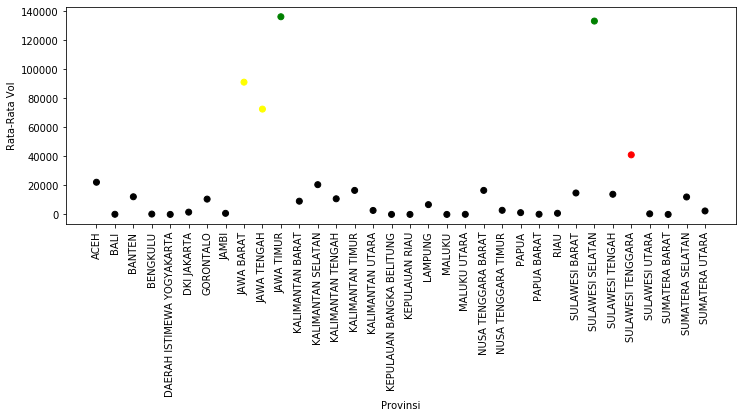

In [11]:
x=avg_vol.index
y=avg_vol['Rata-Rata Vol']
colors={'Level 4':'black', 'Level 3':'red', 'Level 2':'yellow', 'Level 1':'green'}
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x, y, c=avg_vol['Category'].apply(lambda x:colors[x]))
plt.xlabel('Provinsi')
plt.ylabel('Rata-Rata Vol')
plt.xticks(x, avg_vol['Provinsi'], rotation=90)
plt.show()

Terlihat bahwa hasil clustering menunjukkan adanya 4 klaster dalam 1 dataset yang dimana <br>
Klaster level 1 terdiri dari 2 provinsi yaitu Jawa Timur, Sulawesi Selatan (Ditandai dengan warna hijau)<br>
Klaster level 2 terdiri dari 2 provinsi yaitu Jawa Barat, Jawa Tengah (Ditandai dengan warna kuning)<br>
Klaster level 3 terdiri dari 1 provinsi yaitu Sulawesi Tenggara (Ditandai dengan warna merah)<br>
Klaster level 4 terdiri dari 29 provinsi Aceh, Bengkulu, dan lainnya (Ditandai dengan warna hitam) <br>
<table>
    <tr>
        <th><center>Level</center></th>
        <th><center>Penjelasan</center></th>
    </tr>
    <tr>
        <td><center>1</center></td>
        <td>Klaster Provinsi pemroduksi Ikan Bandeng terbanyak di Indonesia</td>
    </tr>
    <tr>
        <td><center>2</center></td>
        <td>Klaster Provinsi pemroduksi Ikan Bandeng terbanyak ke-2 di Indonesia</td>
    </tr>
    <tr>
        <td><center>3</center></td>
        <td>Klaster Provinsi pemroduksi Ikan Bandeng terbanyak ke-3 di Indonesia</td>
    </tr>
    <tr>
        <td><center>4</center></td>
        <td>Klaster Provinsi pemroduksi Ikan Bandeng tersedikit di Indonesia</td>
    </tr>
</table>

In [12]:
datasetL2 = pd.read_csv('Produksi Lele Provinsi.csv', sep=';')

In [13]:
avg_vol = datasetL2.groupby("Provinsi")["Volume Produksi"].mean()

In [14]:
print('Rata-rata Volume Produksi Lele:\n', avg_vol)

Rata-rata Volume Produksi Lele:
 Provinsi
ACEH                            7131.680000
BALI                            2647.499091
BANTEN                         12919.840909
BENGKULU                       14734.275455
DAERAH ISTIMEWA YOGYAKARTA     33729.860909
DKI JAKARTA                     2048.584545
GORONTALO                       2439.510000
JAMBI                           5193.882727
JAWA BARAT                    221984.767273
JAWA TENGAH                   103942.536364
JAWA TIMUR                    103406.307273
KALIMANTAN BARAT                6632.360000
KALIMANTAN SELATAN              4316.478182
KALIMANTAN TENGAH               3255.587273
KALIMANTAN TIMUR                1178.773636
KALIMANTAN UTARA                 321.238889
KEPULAUAN BANGKA BELITUNG       1172.309091
KEPULAUAN RIAU                  9427.826364
LAMPUNG                        24396.904545
MALUKU                            31.270909
MALUKU UTARA                      28.016364
NUSA TENGGARA BARAT             41

In [15]:
clustering=AgglomerativeClustering(n_clusters=4, linkage='average')
clusters=clustering.fit_predict(avg_vol.values.reshape(-1, 1))

In [16]:
print('\nHasil clustering:\n', clusters)


Hasil clustering:
 [1 1 1 1 0 1 1 1 3 2 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]


In [17]:
avg_vol=pd.DataFrame({'Provinsi':avg_vol.index, 'Rata-Rata Vol':avg_vol.values, 'Cluster':clusters})

In [18]:
centroid_perdata=avg_vol.groupby('Cluster')['Rata-Rata Vol'].transform('mean')
centroid=np.unique(centroid_perdata)

In [19]:
sorted_centroid=np.sort(centroid)
Level4, Level3, Level2, Level1 = sorted_centroid[0], sorted_centroid[1], sorted_centroid[2], sorted_centroid[3]
category=centroid_perdata.map({Level4:'Level 4', Level3:'Level 3', Level2:'Level 2', Level1:'Level 1'})
avg_vol['Category']=category

In [20]:
print(avg_vol[["Provinsi", "Category"]])

                      Provinsi Category
0                         ACEH  Level 4
1                         BALI  Level 4
2                       BANTEN  Level 4
3                     BENGKULU  Level 4
4   DAERAH ISTIMEWA YOGYAKARTA  Level 3
5                  DKI JAKARTA  Level 4
6                    GORONTALO  Level 4
7                        JAMBI  Level 4
8                   JAWA BARAT  Level 1
9                  JAWA TENGAH  Level 2
10                  JAWA TIMUR  Level 2
11            KALIMANTAN BARAT  Level 4
12          KALIMANTAN SELATAN  Level 4
13           KALIMANTAN TENGAH  Level 4
14            KALIMANTAN TIMUR  Level 4
15            KALIMANTAN UTARA  Level 4
16   KEPULAUAN BANGKA BELITUNG  Level 4
17              KEPULAUAN RIAU  Level 4
18                     LAMPUNG  Level 3
19                      MALUKU  Level 4
20                MALUKU UTARA  Level 4
21         NUSA TENGGARA BARAT  Level 4
22         NUSA TENGGARA TIMUR  Level 4
23                       PAPUA  Level 4


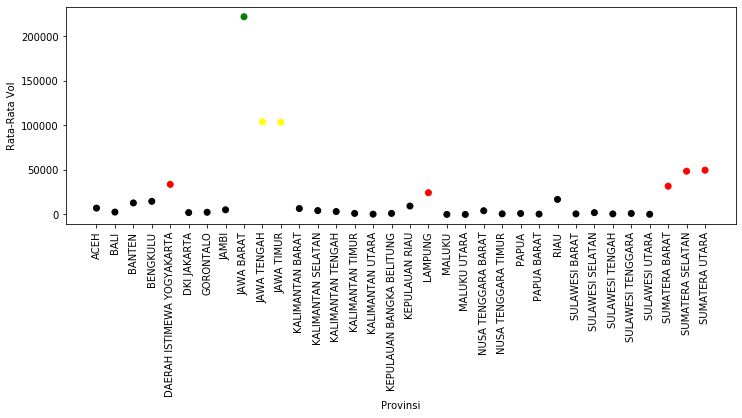

In [21]:
x=avg_vol.index
y=avg_vol['Rata-Rata Vol']
colors={'Level 4':'black', 'Level 3':'red', 'Level 2':'yellow', 'Level 1':'green'}
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x, y, c=avg_vol['Category'].apply(lambda x:colors[x]))
plt.xlabel('Provinsi')
plt.ylabel('Rata-Rata Vol')
plt.xticks(x, avg_vol['Provinsi'], rotation=90)
plt.show()